# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [26]:
import main
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib
import matplotlib.pyplot as plt
import math


***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

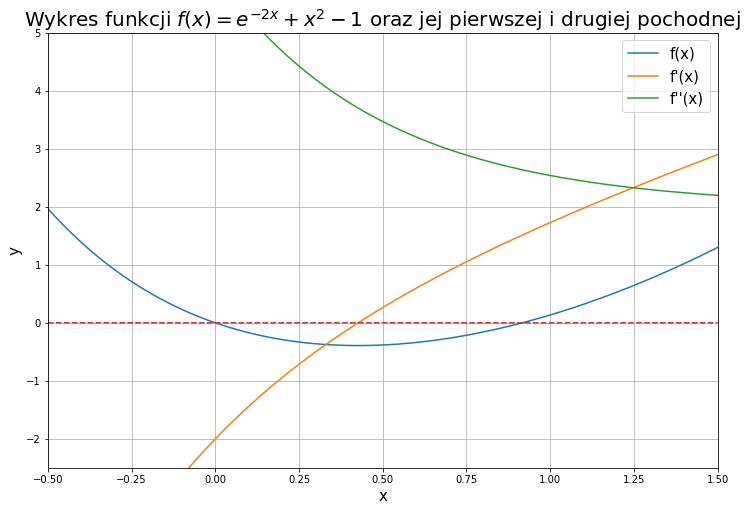

In [2]:
x = np.linspace(-0.5,1.5,1000000)
plt.figure(figsize=(12, 8))
plt.plot(x,main.fun(x))
plt.plot(x,main.dfun(x))
plt.plot(x,main.ddfun(x))
plt.plot(x,np.zeros(1000000),'--')
plt.ylim(-2.5,5)
plt.xlim(-0.5,1.5)
plt.title('Wykres funkcji $f(x) = e^{-2x} + x^2 - 1$ oraz jej pierwszej i drugiej pochodnej',fontsize=20)
plt.grid('on')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend(('f(x)','f\'(x)','f\'\'(x)'),fontsize=15)
plt.show()

Na wykresie widać, że funkcja f posiada dwa miejsca zerowe. Jedno znajduje się bardzo blisko zera w przedziale od -0.15 do 0.1, natomiast w przypadku drugiego można oszacować, że jest w przedziale od 0.85 do 1.

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


***Użycie funkcji root:***

In [3]:
x_root = (sp.optimize.root(main.fun,np.array([-0.15,1.0]))).x
print('Znalezione pierwiastki: ',x_root)
print('Wartości funkcji f dla znalezionych pierwiastków: ',[main.fun(x_root[0]),main.fun(x_root[1])])

Znalezione pierwiastki:  [9.08704990e-16 9.16562583e-01]
Wartości funkcji f dla znalezionych pierwiastków:  [-1.7763568394002505e-15, 3.1086244689504383e-15]


***Użycie funkcji fsolve:***

In [4]:
x_fsolve = sp.optimize.fsolve(main.fun,np.array([-0.15,1.0]))
print('Znalezione pierwiastki: ',x_fsolve)
print('Wartości funkcji f dla znalezionych pierwiastków: ',[main.fun(x_fsolve[0]),main.fun(x_fsolve[1])])

Znalezione pierwiastki:  [9.08704990e-16 9.16562583e-01]
Wartości funkcji f dla znalezionych pierwiastków:  [-1.7763568394002505e-15, 3.1086244689504383e-15]


Jak widać na powyższym przykładzie, obie metody z biblioteki scipy dają identyczne wyniki.

***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

***Wyznaczenie pierwiastków za pomocą metody bisekcji, siecznych i Newtona:***

In [5]:
x_bi = []
x_bi.append(main.bisection(-0.15,0.1,main.fun,epsilon=10e-10,iteration=1000))
x_bi.append(main.bisection(0.85,1,main.fun,epsilon=10e-10,iteration=1000))
x_se = []
x_se.append(main.secant(-0.15,0.1,main.fun,epsilon=10e-10,iteration=1000))
x_se.append(main.secant(0.85,1,main.fun,epsilon=10e-10,iteration=1000))
x_ne = []
x_ne.append(main.newton(main.fun,main.dfun,main.ddfun,-0.15,0.1,epsilon=10e-10,iteration=1000))
x_ne.append(main.newton(main.fun,main.dfun,main.ddfun,0.85,1,epsilon=10e-10,iteration=1000))
print('Pierwiastki wyznaczone metodą bisekcji i towarzysząca im liczba iteracji: ',x_bi)
print('Pierwiastki wyznaczone metodą siecznych i towarzysząca im liczba iteracji: ',x_se)
print('Pierwiastki wyznaczone metodą Newtona i towarzysząca im liczba iteracji: ',x_ne)

Pierwiastki wyznaczone metodą bisekcji i towarzysząca im liczba iteracji:  [(3.7252903539730653e-10, 26), (0.9165625829249622, 26)]
Pierwiastki wyznaczone metodą siecznych i towarzysząca im liczba iteracji:  [(3.241595046874656e-10, 11), (0.9165625826718113, 6)]
Pierwiastki wyznaczone metodą Newtona i towarzysząca im liczba iteracji:  [(2.9581990200644026e-17, 4), (0.9165625831056982, 3)]


***Analiza błędu metod, względem rozwiązania z zadania 5:***

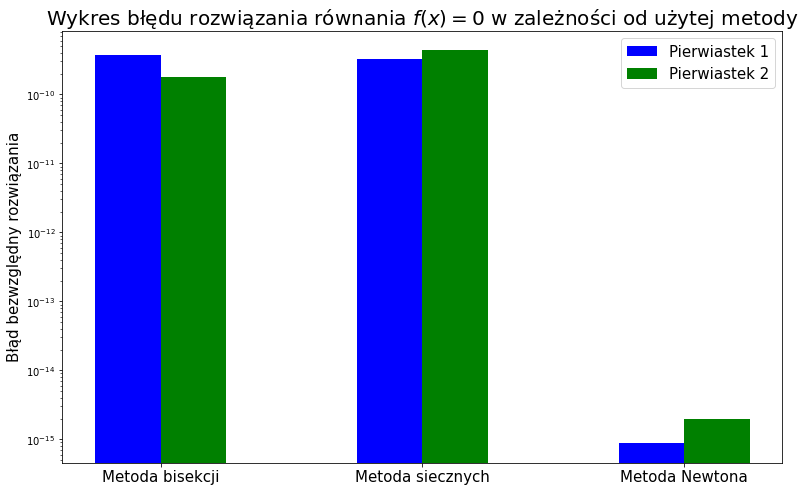

In [6]:
error_root_1 = [abs(x_root[0] - x_bi[0][0]), abs(x_root[0] - x_se[0][0]), abs(x_root[0] - x_ne[0][0])]
error_root_2 = [abs(x_root[1] - x_bi[1][0]), abs(x_root[1] - x_se[1][0]), abs(x_root[1] - x_ne[1][0])]
xstring = ['Metoda bisekcji','Metoda siecznych','Metoda Newtona']
X = np.arange(3)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, error_root_1, color = 'b', width = 0.25)
ax.bar(X + 0.25, error_root_2, color = 'g', width = 0.25)
ax.legend(('Pierwiastek 1','Pierwiastek 2'),fontsize=15)
plt.xticks([r + 0.125 for r in range(3)],xstring,fontsize=15)
plt.ylabel('Błąd bezwzględny rozwiązania',fontsize=15)
ax.set_yscale('log')
ax.set_title('Wykres błędu rozwiązania równania $f(x) = 0$ w zależności od użytej metody',fontsize=20)
plt.show()

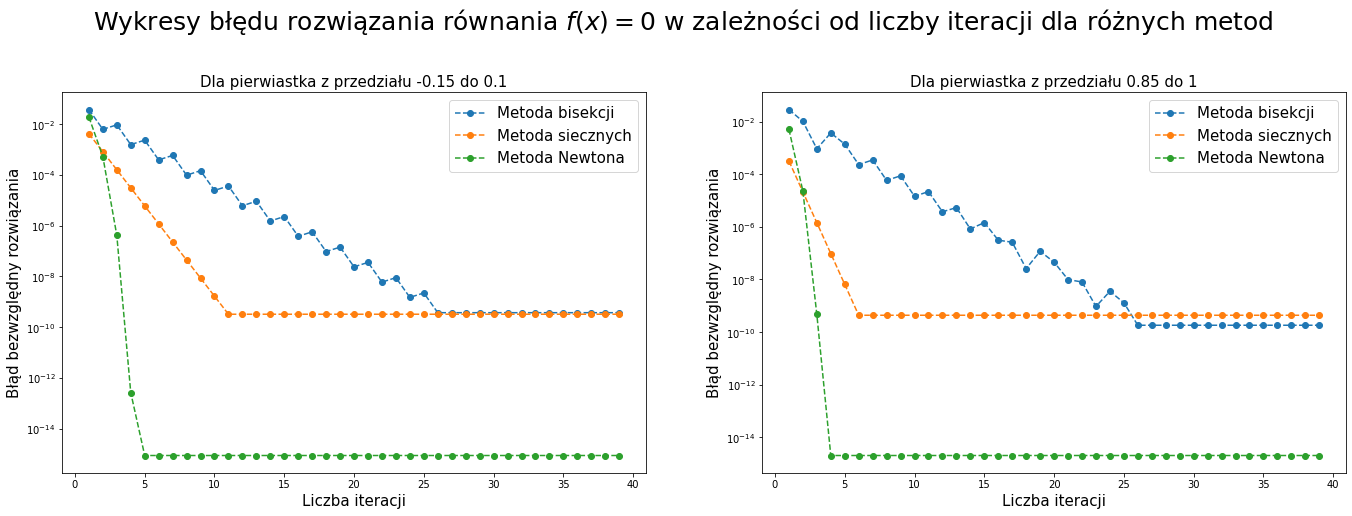

In [27]:
error_bi_1 = []
error_se_1 = []
error_ne_1 = []
error_bi_2 = []
error_se_2 = []
error_ne_2 = []
it_vector = []
for it_lvl in range(1,40):
    error_bi_1.append(abs(x_root[0] - (main.bisection(-0.15,0.1,main.fun,epsilon=10e-10,iteration=it_lvl))[0]))
    error_se_1.append(abs(x_root[0] - (main.secant(-0.15,0.1,main.fun,epsilon=10e-10,iteration=it_lvl))[0]))
    error_ne_1.append(abs(x_root[0] - (main.newton(main.fun,main.dfun,main.ddfun,-0.15,0.1,epsilon=10e-10,iteration=it_lvl))[0]))
    error_bi_2.append(abs(x_root[1] - (main.bisection(0.85,1,main.fun,epsilon=10e-10,iteration=it_lvl))[0]))
    error_se_2.append(abs(x_root[1] - (main.secant(0.85,1,main.fun,epsilon=10e-10,iteration=it_lvl))[0]))
    error_ne_2.append(abs(x_root[1] - (main.newton(main.fun,main.dfun,main.ddfun,0.85,1,epsilon=10e-10,iteration=it_lvl))[0]))
    it_vector.append(it_lvl)
fig, ax = plt.subplots(1,2,figsize=(23,7))
fig.suptitle('Wykresy błędu rozwiązania równania $f(x) = 0$ w zależności od liczby iteracji dla różnych metod',fontsize=25,y=1.05)
ax[0].plot(it_vector,error_bi_1,'o--')
ax[0].plot(it_vector,error_se_1,'o--')
ax[0].plot(it_vector,error_ne_1,'o--')
ax[0].set_yscale('log')
ax[0].set_title('Dla pierwiastka z przedziału -0.15 do 0.1',fontsize=15)
ax[0].set_xlabel('Liczba iteracji',fontsize=15)
ax[0].set_ylabel('Błąd bezwzględny rozwiązania',fontsize=15)
ax[0].legend(xstring,fontsize=15)
ax[1].plot(it_vector,error_bi_2,'o--')
ax[1].plot(it_vector,error_se_2,'o--')
ax[1].plot(it_vector,error_ne_2,'o--')
ax[1].set_yscale('log')
ax[1].set_title('Dla pierwiastka z przedziału 0.85 do 1',fontsize=15)
ax[1].set_xlabel('Liczba iteracji',fontsize=15)
ax[1].set_ylabel('Błąd bezwzględny rozwiązania',fontsize=15)
ax[1].legend(xstring,fontsize=15)
plt.show()

Powyższe wykresy pokazują dużą przewagę metody Newtona nad pozostałymi metodami pod względem koniecznej liczby iteracji do osiągnięcia zadanej dokłądności. Algorytm ten osiąga dokładność już dla 5 iteracji. Co ciekawe duże "skoki" metody Newtona powodują, że ostatecznie znalezione rozwiązanie jest dokładniejsze niż w przypadku pozostałych metod. Metoda siecznych znajduje rozwiązanie o zadanej dokładności dla mniejszej liczby iteracji niż metoda bisekcji. Najgorzej w tym zestawieniu wypada algorytm bisekcji, w którym również ujawnia się jego niestabilność polegająca na znajdowaniu przez funkcję rozwiązań o gorszym przybliżeniu dla kolejnych iteracji ("schodki" na wykresie). Porównując prawy i lewy wykres można również zaobserwować przewagę niektórych metod w konkretnych przypadkach. Tutaj na przykład wyraźnie widać, że metoda siecznych i Newtona działa szybciej dla pierwiastka w przedziale 0.85 do 1, kiedy to metoda bisekcji w obu przypadkach zachowuje się bardzo podobnie.

***Analiza czasowa metod w zależności od liczby iteracji:***

In [8]:
%%capture
time_bi = []
time_se = []
time_ne = []
err_bi = []
err_se = []
er_se = []
err_ne = []
it_vector = []
for it_lvl in range(1,40):
    time = %timeit -o main.bisection(-0.15,0.1,main.fun,epsilon=10e-10,iteration=it_lvl)
    time_bi.append(time.average)
    err_bi.append(time.stdev)
    time = %timeit -o main.secant(-0.15,0.1,main.fun,epsilon=10e-10,iteration=it_lvl)
    time_se.append(time.average)
    err_se.append(time.stdev)
    time = %timeit -o main.newton(main.fun,main.dfun,main.ddfun,-0.15,0.1,epsilon=10e-10,iteration=it_lvl)
    time_ne.append(time.average)
    err_ne.append(time.stdev)
    it_vector.append(it_lvl)

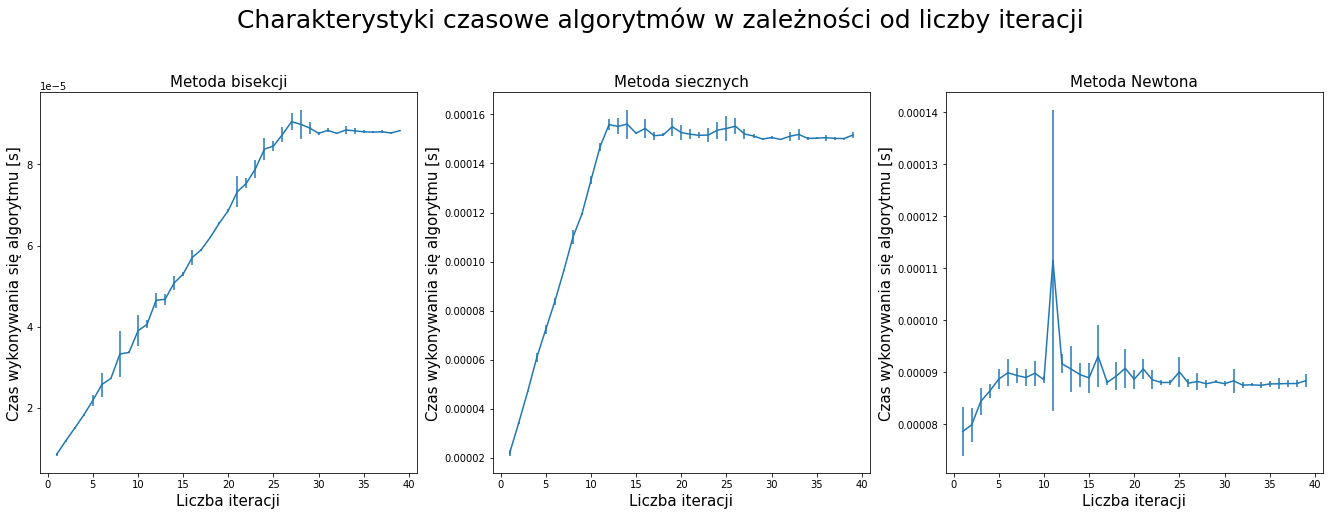

In [18]:
fig, ax = plt.subplots(1,3,figsize=(23,7))
fig.suptitle('Charakterystyki czasowe algorytmów w zależności od liczby iteracji',fontsize=25,y=1.05)
ax[0].errorbar(it_vector,time_bi,yerr=err_bi)
ax[0].set_title('Metoda bisekcji',fontsize=15)
ax[0].set_xlabel('Liczba iteracji',fontsize=15)
ax[0].set_ylabel('Czas wykonywania się algorytmu [s]',fontsize=15)
ax[1].errorbar(it_vector,time_se,yerr=err_se)
ax[1].set_title('Metoda siecznych',fontsize=15)
ax[1].set_xlabel('Liczba iteracji',fontsize=15)
ax[1].set_ylabel('Czas wykonywania się algorytmu [s]',fontsize=15)
ax[2].errorbar(it_vector,time_ne,yerr=err_ne)
ax[2].set_title('Metoda Newtona',fontsize=15)
ax[2].set_xlabel('Liczba iteracji',fontsize=15)
ax[2].set_ylabel('Czas wykonywania się algorytmu [s]',fontsize=15)
plt.show()

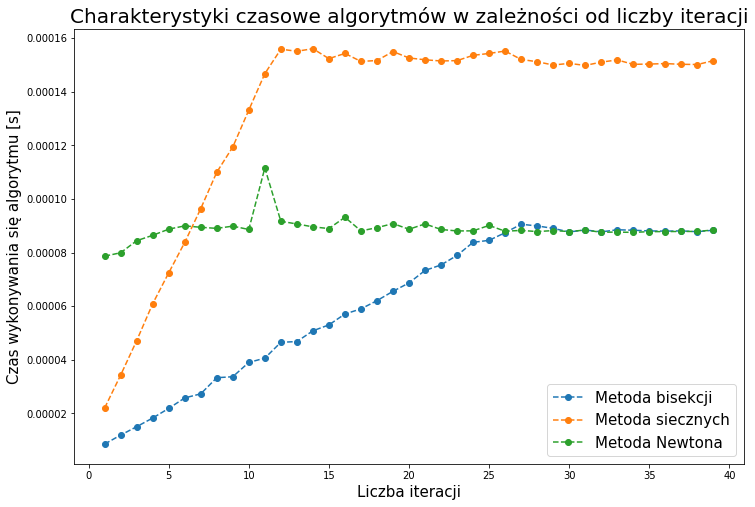

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(it_vector,time_bi,'o--')
plt.plot(it_vector,time_se,'o--')
plt.plot(it_vector,time_ne,'o--')
plt.title('Charakterystyki czasowe algorytmów w zależności od liczby iteracji',fontsize=20)
plt.ylabel('Czas wykonywania się algorytmu [s]',fontsize=15)
plt.xlabel('Liczba iteracji',fontsize=15)
plt.legend(xstring,fontsize=15)
plt.show()

Powyższe wykresy doskonale pokazują, że pod względem czasu działania, metoda bisekcji radzi sobie zdecydowanie najlepiej. Mając jednak na uwadze, że w przypadku metody bisekcji niezbędna jest również większa liczba iteracji do osiągnięcia zadanej dokładności (tutaj około 27) można stwierdzić, że jest ona porównywalna z metodą siecznych, która z kolei potrzebuje więcej czasu na wykonanie kolejnych iteracji ale osiąga zadaną dokładność zdecydowanie szybciej (około 12 iteracji) niż bisekcja. Najlepiej jednak na tle rozważanych algorytmów wypada metoda Newtona, która co prawda dla pierwszych iteracji działa najdłużej, lecz za to osiąga dokładność bardzo szybko, już po zaledwie 5 iteracjach. Warto jednak mieć na uwadze fakt, że metoda Newtona korzysta z wyznaczonych wcześniej analitycznie pochodnych pierwszego rzędu funkcji oraz posiada razem z metodą siecznych więcej ograniczeń (warunków początkowych) niż metoda bisekcji. Ten fakt sprawia, że z punktu widzenia metod numerycznych bisekcja może być niekiedy nawet bardziej użyteczna niż pozostałe metody.